In [1]:
import pandas as pd
import csv
import re
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

%matplotlib inline

In [2]:
from modules import rename_dict

In [3]:
rename_dict

{'about_whole_nation_recoded': {'level': 'ethnicity',
  'measument_level': 'nominal',
  'recode': {'0': {'label': 'no', 'value': 0},
   '1': {'label': 'yes', 'value': 1},
   'unk': {'label': 'unk', 'value': nan}},
  'rus': 'Говорит ли автор об этносе в целом?'},
 'assessor': 'Кодировщик',
 'comment': 'Комментарий кодировщика',
 'date': 'Дата кодирования',
 'do_text_make_sense_raw': {'level': 'answer',
  'measument_level': 'nominal',
  'recode': {'joke': {'label': 'no', 'value': 0},
   'lang': {'label': 'no', 'value': 0},
   'no': {'label': 'no', 'value': 0},
   'yes': {'label': 'yes', 'value': 1}},
  'rus': 'Понятно ли Вам о чём текст?'},
 'document.id': 'ID документа',
 'encourage_aggression_meaning': {'level': 'ethnicity',
  'measument_level': 'ordinal',
  'recode': {'no': {'label': 'no', 'value': 0},
   'yes latent': {'label': 'yes latent', 'value': 1},
   'yes open': {'label': 'yes open', 'value': 2}},
  'rus': 'Призывает ли автор к насильственному оффлайновому действию по отношени

In [4]:
df = pd.read_msgpack("../data/full_df.msgpack")

In [5]:
df.shape

(84573, 63)

In [6]:
df.head()

,about_whole_nation_recoded_value,about_whole_nation_recoded_label,assessor,comment,date,document.id,do_text_make_sense_raw_value,do_text_make_sense_raw_label,encourage_aggression_meaning_value,encourage_aggression_meaning_label,eth_group_to_code,has_eth_conflict_raw_value,has_eth_conflict_raw_label,has_ethnonym_raw_value,has_ethnonym_raw_label,has_pos_eth_interaction_raw_value,has_pos_eth_interaction_raw_label,has_topic_culture_value,has_topic_culture_label,has_topic_daily_routine_value,has_topic_daily_routine_label,has_topic_economics_value,has_topic_economics_label,has_topic_ethicity_value,has_topic_ethicity_label,has_topic_history_value,has_topic_history_label,has_topic_humour_value,has_topic_humour_label,has_topic_migration_value,has_topic_migration_label,has_topic_other_value,has_topic_other_label,has_topic_politics_value,has_topic_politics_label,has_topic_religion_value,has_topic_religion_label,has_topic_society_social_value,has_topic_society_social_label,is_ethicity_aggressor_meaning_value,is_ethicity_aggressor_meaning_label,is_ethicity_dangerous_meaning_value,is_ethicity_dangerous_meaning_label,is_ethicity_superior_meaning_value,is_ethicity_superior_meaning_label,is_text_neg_raw_value,is_text_neg_raw_label,is_text_positive_raw_value,is_text_positive_raw_label,opinion_about_ethnonym_recoded_value,opinion_about_ethnonym_recoded_label,represent_ethicity_meaning_value,represent_ethicity_meaning_label,seed_eth_group,source_x,stage,source_y,source_text,lemm_text,city,region,created_date,instance_id
0,1.0,yes,skuchilina,NaN,2016-09-25 20:06:34,883,1,yes,0.0,no,тибетец,0.0,no,2.0,several,1.0,yes,1.0,yes,0.0,no,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,NaN,irrelevant,0.0,no,NaN,irrel,0.0,no,1.0,weak,1.0,neutral,0.0,no,монгол,vk,1,vk,Музыка Китая – одна из древнейших в мировой му...,музыка китай древний мирова музыкальный культу...,Владимир,Владимирская область,2015-08-13,883_тибетец
1,1.0,yes,skuchilina,NaN,2016-09-25 20:06:34,883,1,yes,0.0,no,монгол,0.0,no,2.0,several,1.0,yes,1.0,yes,0.0,no,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,NaN,irrelevant,0.0,no,NaN,irrel,0.0,no,1.0,weak,1.0,neutral,0.0,no,монгол,vk,1,vk,Музыка Китая – одна из древнейших в мировой му...,музыка китай древний мирова музыкальный культу...,Владимир,Владимирская область,2015-08-13,883_монгол
2,1.0,yes,dianasadr,NaN,2016-09-26 17:08:13,883,1,yes,0.0,no,тибетец,0.0,no,2.0,several,0.0,no,1.0,yes,0.0,no,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,NaN,irrelevant,0.0,no,NaN,irrel,0.0,no,2.0,strong,2.0,positive,0.0,no,монгол,vk,1,vk,Музыка Китая – одна из древнейших в мировой му...,музыка китай древний мирова музыкальный культу...,Владимир,Владимирская область,2015-08-13,883_тибетец
3,1.0,yes,dianasadr,NaN,2016-09-26 17:08:13,883,1,yes,0.0,no,монгол,0.0,no,2.0,several,0.0,no,1.0,yes,0.0,no,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,NaN,irrelevant,0.0,no,NaN,irrel,0.0,no,2.0,strong,2.0,positive,0.0,no,монгол,vk,1,vk,Музыка Китая – одна из древнейших в мировой му...,музыка китай древний мирова музыкальный культу...,Владимир,Владимирская область,2015-08-13,883_монгол
4,NaN,NaN,Oleg Nagornyy,NaN,2016-07-29 15:10:42,883,1,yes,NaN,NaN,монгол,0.0,no,1.0,one,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,NaN,NaN,NaN,NaN,NaN,NaN,2.0,strong,0.0,no,NaN,NaN,NaN,NaN,монгол,vk,1,vk,Музыка Китая – одна из древнейших в мировой му...,музыка китай древний мирова музыкальный культу...,Владимир,Владимирская область,2015-08-13,883_монгол


In [7]:
df_instance = df.query(
    "((has_ethnonym_raw_label == 'one') | (has_ethnonym_raw_label == 'several')) &"\
    "(do_text_make_sense_raw_label == 'yes') &"\
    "(has_topic_ethicity_label) == 'yes'"
).copy()

In [58]:
len(df_instance["instance_id"].unique())

31334

In [8]:
df.shape, df_instance.shape

((84573, 63), (63080, 63))

Количество Instances?

In [45]:
len(df["instance_id"].unique())

35260

# Распределение ответов в разных переменных

Рассчитаем количество кодирований этнонимов в текстах:

In [39]:
text_counts = df[["document.id", "assessor", "eth_group_to_code"]]\
    .groupby(["document.id"])\
    .agg({
        "assessor": lambda x: len(x.unique())
    })
text_counts

,assessor
document.id,
883,3
2942,3
9333,2
9346,1
12039,1
17208,3
19367,4
21292,1
21635,3


In [40]:
text_counts.pipe(lambda x: x["assessor"] == 3).sum(),\
text_counts.pipe(lambda x: x["assessor"] > 3).sum(),\
text_counts.pipe(lambda x: x["assessor"] < 3).sum()

(11547, 2135, 908)

In [41]:
text_counts3 = text_counts[text_counts.pipe(lambda x: x["assessor"] == 3)]\
                    .index.tolist()
text_counts3

[883,
 2942,
 17208,
 21635,
 22019,
 25145,
 27418,
 35343,
 35869,
 40215,
 41454,
 48444,
 48770,
 50060,
 50517,
 55368,
 57451,
 62040,
 66666,
 71624,
 72737,
 75835,
 79754,
 81359,
 86690,
 87018,
 93672,
 99382,
 101519,
 101899,
 102779,
 105308,
 107304,
 108715,
 115795,
 118011,
 118362,
 118529,
 120788,
 131931,
 147273,
 147618,
 148175,
 150278,
 151850,
 157386,
 170675,
 170997,
 190831,
 195825,
 197300,
 199467,
 199999,
 202870,
 203374,
 204587,
 205069,
 205103,
 208067,
 218257,
 235542,
 236290,
 236669,
 244478,
 245794,
 253292,
 254342,
 255162,
 256081,
 256346,
 257417,
 258979,
 260176,
 267853,
 272110,
 272915,
 277739,
 279690,
 280208,
 280358,
 281163,
 282921,
 288729,
 294466,
 295264,
 297771,
 298883,
 300225,
 300523,
 301798,
 302446,
 307677,
 308997,
 315762,
 323643,
 326110,
 326759,
 330764,
 331113,
 332122,
 333042,
 333587,
 334507,
 335039,
 343279,
 343493,
 345880,
 347059,
 349445,
 350931,
 351893,
 351986,
 352785,
 361119,
 3622

In [42]:
instance_counts = df_instance[["instance_id", "assessor", "eth_group_to_code"]]\
    .groupby(["instance_id"])\
    .agg({
        "assessor": lambda x: len(x.unique())
    })

instance_counts.pipe(lambda x: x["assessor"] == 3).sum(),\
instance_counts.pipe(lambda x: x["assessor"] < 3).sum(),\
instance_counts.pipe(lambda x: x["assessor"] > 3).sum()

(7402, 22593, 1339)

Распределение

In [44]:
var_value = "has_eth_conflict_raw_value"

df[df["document.id"].isin(text_counts3)]\
    [["document.id", "assessor", var_value]]\
    .groupby(["document.id", "assessor"])\
    .first()

has_eth_conflict_raw_value
document.id assessor                                 
883         Oleg Nagornyy                         0.0
            dianasadr                             0.0
            skuchilina                            0.0
2942        Oleg Nagornyy                         0.0
            Tatiana                               0.0
            nicketas                              0.0
17208       Dasha                                 0.0
            Oleg Nagornyy                         0.0
            adzhigitova                           0.0
21635       Tatiana                               0.0
            dianasadr                             0.0
            yadviga                               0.0
22019       Dasha                                 0.0
            Oleg Nagornyy                         0.0
            skuchilina                            0.0
25145       Tatiana                               NaN
            skuchilina                            NaN
            yadviga                               NaN
27418       Dasha                                 NaN
            Oleg Nagornyy                         NaN
            Tatiana                               NaN
35343       Oleg Nagornyy                         0.0
            Tatiana                               0.0
            an_men                                0.0
35869       Dasha                                 0.0
            Oleg Nagornyy                         0.0
            Tatiana                               0.0
40215       Tatiana                               0.0
            adzhigitova                           0.0
            yadviga                               NaN
41454       Oleg Nagornyy                         NaN
            an_men                                NaN
            dianasadr                             NaN
48444       Dasha                                 NaN
            salexeeva                             NaN
            yadviga                               NaN
48770       Oleg Nagornyy                         NaN
            an_men                                NaN
            dianasadr                             NaN
50060       an_men                                1.0
            asukhanova                            NaN
            dianasadr                             0.0
50517       Dasha                                 NaN
            Oleg Nagornyy                         NaN
            yadviga                               NaN
55368       Oleg Nagornyy                         0.0
            adzhigitova                           1.0
            yadviga                               1.0
57451       Dasha                                 0.0
            Tatiana                               0.0
            an_men                                0.0
62040       Oleg Nagornyy                         1.0
            adzhigitova                           1.0
            yadviga                               NaN
66666       Oleg Nagornyy                         0.0
            Tatiana                               0.0
            yadviga                               0.0
71624       Dasha                                 0.0
            Oleg Nagornyy                         NaN
            Tatiana                               0.0
72737       Dasha                                 NaN
            Tatiana                               NaN
            yadviga                               NaN
75835       Dasha                                 0.0
            Oleg Nagornyy                         0.0
            yadviga                               NaN
79754       Dasha                                 NaN
            Oleg Nagornyy                         NaN
            Tatiana                               0.0
81359       Oleg Nagornyy                         0.0
            Tatiana                               0.0
            skuchilina                            0.0
86690       Oleg Nagornyy      

In [ ]:
text_distr = pd.ExcelWriter('../output/text_distr.xlsx')
inst_distr = pd.ExcelWriter('../output/inst_distr.xlsx')

_ = df[df["document.id"].isin(text_counts3)]

for var, val in rename_dict.items():
    if type(val) == dict:
        var_value = var + "_value"
        print(var_value)
        if val["level"] == "answer":
            _\
                [["document.id", "assessor", var_value]]\
                .groupby(["document.id", "assessor"])\
                .first()\
                .mean(level="document.id")\
                [var_value]\
                .value_counts()\
                .sort_index()\
                .to_excel(text_writer, "t_" + var[:20])
        else:
            instance_counts = df_instance.dropna(subset=[var_value])[["instance_id", "assessor", var_value]]\
                .groupby(["instance_id"])\
                .agg({
                    "assessor": lambda x: len(x.unique())
                })
            instance_counts3 = instance_counts[instance_counts.pipe(lambda x: x["assessor"] == 3)].index.tolist()

            df_instance[df_instance["instance_id"].isin(instance_counts3)]\
                [["instance_id", "assessor", var_value]]\
                .groupby(["instance_id", "assessor"])\
                .first()\
                .mean(level="instance_id")\
                [var_value]\
                .value_counts()\
                .sort_index()\
                .to_excel(inst_writer, "i_" + var[:20])


text_distr.save()
inst_distr.save()

In [ ]:
text_distr2 = pd.ExcelWriter('../output/text_distr2.xlsx')
inst_distr2 = pd.ExcelWriter('../output/inst_distr2.xlsx')

_ = df[df["document.id"].isin(text_counts3)]

for var, val in rename_dict.items():
    if type(val) == dict:
        var_value = var + "_value"
        print(var_value)
        if val["level"] == "answer":
            _\
                [["document.id", "assessor", var_value]]\
                .groupby(["document.id", "assessor"])\
                .first()\
                .mean(level="document.id")\
                [var_value]\
                .value_counts()\
                .sort_index()\
                .to_excel(text_writer, "t_" + var[:20])
        else:
            instance_counts = df_instance.dropna(subset=[var_value])[["instance_id", "assessor", var_value]]\
                .groupby(["instance_id"])\
                .agg({
                    "assessor": lambda x: len(x.unique())
                })
            instance_counts3 = instance_counts[instance_counts.pipe(lambda x: x["assessor"] == 3)].index.tolist()

            df_instance[df_instance["instance_id"].isin(instance_counts3)]\
                [["instance_id", "assessor", var_value]]\
                .groupby(["instance_id", "assessor"])\
                .first()\
                .mean(level="instance_id")\
                [var_value]\
                .value_counts()\
                .sort_index()\
                .to_excel(inst_writer, "i_" + var[:20])


text_distr2.save()
inst_distr2.save()

In [63]:
df[df["document.id"] == 203374]

,about_whole_nation_recoded_value,about_whole_nation_recoded_label,assessor,comment,date,document.id,do_text_make_sense_raw_value,do_text_make_sense_raw_label,encourage_aggression_meaning_value,encourage_aggression_meaning_label,eth_group_to_code,has_eth_conflict_raw_value,has_eth_conflict_raw_label,has_ethnonym_raw_value,has_ethnonym_raw_label,has_pos_eth_interaction_raw_value,has_pos_eth_interaction_raw_label,has_topic_culture_value,has_topic_culture_label,has_topic_daily_routine_value,has_topic_daily_routine_label,has_topic_economics_value,has_topic_economics_label,has_topic_ethicity_value,has_topic_ethicity_label,has_topic_history_value,has_topic_history_label,has_topic_humour_value,has_topic_humour_label,has_topic_migration_value,has_topic_migration_label,has_topic_other_value,has_topic_other_label,has_topic_politics_value,has_topic_politics_label,has_topic_religion_value,has_topic_religion_label,has_topic_society_social_value,has_topic_society_social_label,is_ethicity_aggressor_meaning_value,is_ethicity_aggressor_meaning_label,is_ethicity_dangerous_meaning_value,is_ethicity_dangerous_meaning_label,is_ethicity_superior_meaning_value,is_ethicity_superior_meaning_label,is_text_neg_raw_value,is_text_neg_raw_label,is_text_positive_raw_value,is_text_positive_raw_label,opinion_about_ethnonym_recoded_value,opinion_about_ethnonym_recoded_label,represent_ethicity_meaning_value,represent_ethicity_meaning_label,seed_eth_group,source_x,stage,source_y,source_text,lemm_text,city,region,created_date,instance_id
263,NaN,NaN,Tatiana,NaN,2016-08-03 15:51:04,203374,1,yes,NaN,NaN,карел,0.0,no,0.0,no,0.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,no,0.0,no,NaN,NaN,NaN,NaN,карел,vk,1,vk,?? Карельские поэты?? К а р е л и я@Игорь Авер...,карельский поэт игорь лес болото скал ламб вол...,Петрозаводск,Карелия,2015-07-21,203374_карел
264,NaN,NaN,Oleg Nagornyy,NaN,2016-07-29 15:17:59,203374,1,yes,NaN,NaN,карел,0.0,no,1.0,one,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,NaN,NaN,NaN,NaN,NaN,NaN,2.0,strong,0.0,no,NaN,NaN,NaN,NaN,карел,vk,1,vk,?? Карельские поэты?? К а р е л и я@Игорь Авер...,карельский поэт игорь лес болото скал ламб вол...,Петрозаводск,Карелия,2015-07-21,203374_карел
265,1.0,yes,dianasadr,NaN,2016-10-03 22:00:10,203374,1,yes,0.0,no,карел,0.0,no,1.0,one,0.0,no,1.0,yes,0.0,no,0.0,no,1.0,yes,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,0.0,no,NaN,irrelevant,0.0,no,NaN,irrel,0.0,no,2.0,strong,2.0,positive,1.0,yes,карел,vk,1,vk,?? Карельские поэты?? К а р е л и я@Игорь Авер...,карельский поэт игорь лес болото скал ламб вол...,Петрозаводск,Карелия,2015-07-21,203374_карел


In [ ]:
.quantile([0,.25,.5,.75,1])

In [119]:
df[df["document.id"].isin(text_counts3)]\
    [["document.id", "assessor", var_value]]\
    .groupby(["document.id", "assessor"])\
    .first()\
    .mean(level="document.id")\
    [var_value]\
    .quantile([0,1/3,2/3,1])

0.000000    0.0
0.333333    0.0
0.666667    0.0
1.000000    1.0
Name: represent_ethicity_meaning_value, dtype: float64

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [149]:
pd.Series(np.arange(0, 3, 0.001)).quantile([0,1/3,2/3,1]).iloc[3]

0.000000    0.000000
0.333333    0.999667
0.666667    1.999333
1.000000    2.999000
dtype: float64

In [178]:
var_value = "do_text_make_sense_raw_value"

In [180]:
df[df["document.id"].isin(text_counts3)]\
                [["document.id", "assessor", var_value]]\
                .groupby(["document.id", "assessor"])\
                .first()\
                .mean(level="document.id")\
                [var_value]\
                .isnull().sum()

0

In [182]:
instance_counts = df_instance.dropna(subset=[var_value])[["instance_id", "assessor", var_value]]\
    .groupby(["instance_id"])\
    .agg({
        "assessor": lambda x: len(x.unique())
    })
instance_counts3 = instance_counts[instance_counts.pipe(lambda x: x["assessor"] == 3)].index.tolist()

df_instance[df_instance["instance_id"].isin(instance_counts3)]\
    [["instance_id", "assessor", var_value]]\
    .groupby(["instance_id", "assessor"])\
    .first()\
    .mean(level="instance_id")\
    [var_value]

instance_id
1000000333_беларус            1.000000
1000000333_казах              1.000000
1000000333_украинец           1.000000
1000000333_чеченец            1.000000
1000188059_китаец             1.000000
1000188059_чучмек             1.000000
1001154512_алан               1.000000
1001170410_бурят              0.666667
1001170410_калмык             1.000000
1001170410_тува               1.000000
1001170410_якут               1.000000
1001215069_жид                1.000000
1001215069_украинец           1.000000
1001345295_жид                1.000000
1001345295_таджик             1.000000
1001356975_русский            1.000000
1001356975_таджик             1.000000
1001637520_казак              0.666667
1001851767_кабардинец         0.000000
1001884922_русский            0.666667
1002040907_даргинец           1.000000
1002040907_кумык              0.000000
1002200256_башкир             1.000000
1002200256_русский            1.000000
1002616732_еврей              1.000000
1002616732_ру

In [183]:
intervals = {}

for var, val in rename_dict.items():
    if type(val) == dict:
        var_value = var + "_value"
        print(var_value)
        intervals[var_value] = {}
        if val["level"] == "answer":
            temp1 = df[df["document.id"].isin(text_counts3)]\
                [["document.id", "assessor", var_value]]\
                .groupby(["document.id", "assessor"])\
                .first()\
                .mean(level="document.id")\
                [var_value]
                

            segments = ("первая треть", "вторая треть", "третья треть")
            rang = temp1.max() - temp1.min()

            for i in segments:
                if i == "первая треть":
                    intervals[var_value][i] = temp1\
                        .apply(lambda x: (x < rang/3) if not np.isnan(x) else "missings")\
                        .value_counts()\
                        .to_dict()
                elif i == "вторая треть":
                    intervals[var_value][i] = temp1\
                        .apply(lambda x: ((x >= rang/3) and (x < rang/3*2)) if not np.isnan(x) else "missings")\
                        .value_counts()\
                        .to_dict()
                elif i == "третья треть":
                    intervals[var_value][i] = temp1\
                        .apply(lambda x: (x > rang/3*2) if not np.isnan(x) else "missings")\
                        .value_counts()\
                        .to_dict()
                        
        if val["level"] == "ethnicity":
            instance_counts = df_instance.dropna(subset=[var_value])[["instance_id", "assessor", var_value]]\
                .groupby(["instance_id"])\
                .agg({
                    "assessor": lambda x: len(x.unique())
                })
            instance_counts3 = instance_counts[instance_counts.pipe(lambda x: x["assessor"] == 3)].index.tolist()

            temp1 = df_instance[df_instance["instance_id"].isin(instance_counts3)]\
                [["instance_id", "assessor", var_value]]\
                .groupby(["instance_id", "assessor"])\
                .first()\
                .mean(level="instance_id")\
                [var_value]
                

            segments = ("первая треть", "вторая треть", "третья треть")
            rang = temp1.max() - temp1.min()

            for i in segments:
                if i == "первая треть":
                    intervals[var_value][i] = temp1\
                        .apply(lambda x: (x < rang/3) if not np.isnan(x) else "missings")\
                        .value_counts()\
                        .to_dict()
                elif i == "вторая треть":
                    intervals[var_value][i] = temp1\
                        .apply(lambda x: ((x >= rang/3) and (x < rang/3*2)) if not np.isnan(x) else "missings")\
                        .value_counts()\
                        .to_dict()
                elif i == "третья треть":
                    intervals[var_value][i] = temp1\
                        .apply(lambda x: (x > rang/3*2) if not np.isnan(x) else "missings")\
                        .value_counts()\
                        .to_dict()

about_whole_nation_recoded_value
do_text_make_sense_raw_value
encourage_aggression_meaning_value
has_eth_conflict_raw_value
has_ethnonym_raw_value
has_pos_eth_interaction_raw_value
has_topic_culture_value
has_topic_daily_routine_value
has_topic_economics_value
has_topic_ethicity_value
has_topic_history_value
has_topic_humour_value
has_topic_migration_value
has_topic_other_value
has_topic_politics_value
has_topic_religion_value
has_topic_society_social_value
is_ethicity_aggressor_meaning_value
is_ethicity_dangerous_meaning_value
is_ethicity_superior_meaning_value
is_text_neg_raw_value
is_text_positive_raw_value
opinion_about_ethnonym_recoded_value
represent_ethicity_meaning_value


In [188]:
intervals

{'about_whole_nation_recoded_value': {'вторая треть': {False: 6518, True: 360},
  'первая треть': {False: 6271, True: 607},
  'третья треть': {False: 1826, True: 5052}},
 'do_text_make_sense_raw_value': {'вторая треть': {False: 11019, True: 528},
  'первая треть': {False: 10958, True: 589},
  'третья треть': {False: 2737, True: 8810}},
 'encourage_aggression_meaning_value': {'вторая треть': {False: 7314,
   True: 88},
  'первая треть': {False: 107, True: 7295},
  'третья треть': {False: 7393, True: 9}},
 'has_eth_conflict_raw_value': {'вторая треть': {False: 8976,
   True: 1953,
   'missings': 618},
  'первая треть': {False: 4002, True: 6927, 'missings': 618},
  'третья треть': {False: 9869, True: 1060, 'missings': 618}},
 'has_ethnonym_raw_value': {'вторая треть': {False: 7430,
   True: 3506,
   'missings': 611},
  'первая треть': {False: 9604, True: 1332, 'missings': 611},
  'третья треть': {False: 5435, True: 5501, 'missings': 611}},
 'has_pos_eth_interaction_raw_value': {'вторая тр

In [189]:
quantiles = pd.ExcelWriter('../output/quantiles.xlsx')

for var, val in intervals.items():
    pd.DataFrame(val)\
        .to_excel(quantiles, var[:20])
quantiles.save()

In [101]:
var_value = "has_topic_ethicity_value"

df[df["document.id"].isin(text_counts3)]\
    [["document.id", "assessor", var_value]]\
    .groupby(["document.id", "assessor"])\
    .first()\
    .mean(level="document.id")\
    [var_value]\
    .apply(lambda x: x > 1/3 if not np.isnan(x) else np.nan)\
    .fillna("missings")\
    .value_counts().to_dict()

{False: 2227, True: 7696, 'missings': 1624}

In [99]:
df[df["document.id"].isin(text_counts3)]\
    [["document.id", "assessor", var_value]]\
    .groupby(["document.id", "assessor"])\
    .first()\
    .mean(level="document.id")\
    [var_value]\
    .apply(lambda x: x > 1/3 if not np.isnan(x) else np.nan)\
    .isnull().sum()

3535

In [80]:
_

document.id
883           0.666667
2942          0.000000
17208         0.666667
21635         1.000000
22019         0.666667
25145              NaN
27418              NaN
35343         0.000000
35869         0.000000
40215         0.500000
41454              NaN
48444              NaN
48770              NaN
50060         0.500000
50517              NaN
55368         0.666667
57451         0.666667
62040         1.000000
66666         0.000000
71624         0.000000
72737              NaN
75835         0.000000
79754         0.000000
81359         1.000000
86690         0.000000
87018         0.000000
93672         1.000000
99382         0.000000
101519        0.333333
101899        1.000000
102779        0.000000
105308        1.000000
107304        1.000000
108715        0.666667
115795        1.000000
118011        0.666667
118362        0.333333
118529        0.000000
120788             NaN
131931             NaN
147273        0.666667
147618        0.666667
148175        0.000000

In [82]:
np.isnan(_.loc[25145])

True

In [17]:
text_writer = pd.ExcelWriter('../output/text_counts3.xlsx')
inst_writer = pd.ExcelWriter('../output/inst_counts3.xlsx')

_ = df[df["document.id"].isin(text_counts3)]

for var, val in rename_dict.items():
    if type(val) == dict:
        var_value = var + "_value"
        print(var_value)
        if val["level"] == "answer":
            _\
                [["document.id", "assessor", var_value]]\
                .groupby(["document.id", "assessor"])\
                .first()\
                .mean(level="document.id")\
                [var_value]\
                .value_counts()\
                .sort_index()\
                .to_excel(text_writer, "t_" + var[:20])
        else:
            instance_counts = df_instance.dropna(subset=[var_value])[["instance_id", "assessor", var_value]]\
                .groupby(["instance_id"])\
                .agg({
                    "assessor": lambda x: len(x.unique())
                })
            instance_counts3 = instance_counts[instance_counts.pipe(lambda x: x["assessor"] == 3)].index.tolist()

            df_instance[df_instance["instance_id"].isin(instance_counts3)]\
                [["instance_id", "assessor", var_value]]\
                .groupby(["instance_id", "assessor"])\
                .first()\
                .mean(level="instance_id")\
                [var_value]\
                .value_counts()\
                .sort_index()\
                .to_excel(inst_writer, "i_" + var[:20])


text_writer.save()
inst_writer.save()

about_whole_nation_recoded_value
do_text_make_sense_raw_value
encourage_aggression_meaning_value
has_eth_conflict_raw_value
has_ethnonym_raw_value
has_pos_eth_interaction_raw_value
has_topic_culture_value
has_topic_daily_routine_value
has_topic_economics_value
has_topic_ethicity_value
has_topic_history_value
has_topic_humour_value
has_topic_migration_value
has_topic_other_value
has_topic_politics_value
has_topic_religion_value
has_topic_society_social_value
is_ethicity_aggressor_meaning_value
is_ethicity_dangerous_meaning_value
is_ethicity_superior_meaning_value
is_text_neg_raw_value
is_text_positive_raw_value
opinion_about_ethnonym_recoded_value
represent_ethicity_meaning_value


# Рассчитываем сходимость по Криппендорфу

* https://github.com/pln-fing-udelar/fast-krippendorff
* https://repository.upenn.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1043&context=asc_papers

social scientists commonly rely on data with reliabilities α ≥ .800, consider data with 0.800 > α ≥ 0.667 only to draw tentative conclusions, and discard data whose agreement measures α < 0.667.

In [8]:
import krippendorff

Тестируем корректность библиотеки на демонстрационных данных из [wiki](https://en.wikipedia.org/wiki/Krippendorff%27s_alpha).

In [9]:
wiki_kripp = np.array([
    np.nan, np.nan, np.nan, np.nan, np.nan, 3, 4, 1, 2, 1, 1, 3, 3, np.nan, 3,
    1, np.nan, 2, 1, 3, 3, 4, 3, np.nan, np.nan, np.nan, np.nan, np.nan,
    np.nan, np.nan, np.nan, np.nan, 2, 1, 3, 4, 4, np.nan, 2, 1, 1, 3, 3,
    np.nan, 4
]).reshape((3, 15), order="C")

In [10]:
(
    krippendorff.alpha(wiki_kripp, level_of_measurement='nominal'),
    krippendorff.alpha(wiki_kripp, level_of_measurement='ordinal')
)

(0.691358024691358, 0.8969072164948454)

Всё работает.

Пишем функцию для рассчёта сходимости на наших данных

In [12]:
def to_numeric(series):
    return series.astype('category').cat.codes.replace({-1: np.nan})

In [69]:
df[["is_ethicity_dangerous_meaning_value", "document.id", "assessor", "eth_group_to_code"]].duplicated().sum()

0

In [26]:
df_instance[["instance_id", "assessor", "is_ethicity_superior_meaning_value"]]\
            .groupby(["instance_id", "assessor"])\
            .first()\
            .reset_index()\
            .pivot(index="assessor", columns="instance_id")\
            ["is_ethicity_superior_meaning_value"]\
            .reset_index()\
            .iloc[:,1:]

instance_id,1000000333_беларус,1000000333_другой,1000000333_казах,1000000333_ногаец,1000000333_украинец,1000000333_чеченец,1000085771_эстонец,1000188059_другой,1000188059_китаец,1000188059_русский,1000188059_черножопый,1000188059_чучмек,1000201284_азиат,1000201284_армянин,1000201284_грузин,1000201284_дагестанец,1000201284_кавказец,1000201284_немец,1000201284_поляк,1000201284_помор,1000201284_прибалт,1000201284_россиянин,1000201284_русский,1000201284_северянин,1000201284_француз,1000201284_чеченец,1000201284_якут,1000300304_вайнах,1000300304_казак,1000347_украинец,1000348083_бурят,1000348083_поляк,1000348083_прибалт,1000348083_украинец,1000539562_вайнах,1000539562_горец,1000539562_другой,1000539562_ингуш,1000539562_кабардинец,1000539562_кумык,1000539562_русский,1000579336_казак,1000638_украинец,1000724475_эстонец,1000724731_эстонец,1000890868_казак,1001154512_алан,1001154512_осетин,1001170410_бурят,1001170410_другой,1001170410_калмык,1001170410_маньчжур,1001170410_монгол,1001170410_тува,1001170410_якут,1001196679_казак,1001215069_жид,1001215069_поляк,1001215069_украинец,1001256210_американец,1001256210_дагестанец,1001256210_даргинец,1001256210_другой,1001256210_кумык,1001256210_саудовец,1001324002_молдаванин,1001324002_россиянин,1001334193_казак,1001345295_еврей,1001345295_жид,1001345295_таджик,1001351708_эвенк,1001356975_русский,1001356975_таджик,1001397826_армянин,1001397826_беларус,1001397826_казах,1001397826_киргиз,1001449891_россиянин,1001637520_казак,1001709527_ингуш,1001709527_осетин,1001851767_кабардинец,1001854546_осетин,1001884922_адыг,1001884922_русский,1001933788_казак,1002008273_казах,1002008273_таджик,1002008273_узбек,1002040907_аварец,1002040907_даргинец,1002040907_кумык,1002040907_лакец,1002040907_лезгин,1002160677_гастарбайтер,1002200256_башкир,1002200256_беларус,1002200256_казах,1002200256_мордва,1002200256_русский,1002200256_татарин,1002200256_украинец,1002262646_другой,1002262646_казах,1002262646_француз,1002616732_другой,1002616732_еврей,1002616732_казах,1002616732_киргиз,1002616732_русский,1002616732_таджик,1002616732_узбек,1002660877_осетин,1003218410_ингуш,1003218410_осетин,1003268890_азербайджанец,1003268890_алтаец,1003268890_балкарец,1003268890_другой,1003268890_кабардинец,1003268890_кумык,1003268890_ногаец,1003268890_татарин,1003268890_хакас,1003268890_шорец,1003322652_киргиз,1003500976_азербайджанец,1003500976_лезгин,1003534_русский,1003534_украинец,1003613303_американец,1003613303_грек,1003613303_еврей,1003613303_нерусь,1003613303_русский,1003613303_таджик,1003613303_украинец,1003726_украинец,1003944399_алтаец,1003944399_уйгур,1004266301_латыш,1004266301_литовец,1004266301_эстонец,1004379932_абориген,1004379932_абхаз,1004379932_грузин,1004379932_другой,1004379932_казах,1004379932_помор,...,995203014_дагестанец,995208244_казах,995208244_прибалт,995216215_поляк,995216215_прибалт,995270322_адыг,995270322_казак,995274709_кумык,995305324_татарин,995306232_россиянин,995369884_грузин,995369884_русский,995429629_латыш,995429629_прибалт,995487498_адыг,995487498_казак,995581510_аварец,995642097_аварец,995642097_даргинец,995692664_аварец,995692664_азербайджанец,995720058_адыг,995720058_казак,995827575_алан,995827575_дигорец,995827575_другой,995827575_осетин,995830668_даргинец,995891038_нерусь,996047241_европеец,996047241_кавказец,996047241_киргиз,996047241_русский,996099454_абазин,996099454_дагестанец,996099454_кабардинец,996099454_кавказец,996099454_осетин,996099454_славянин,996099454_чеченец,996274031_казах,996274031_киргиз,996274031_китаец,996274031_кореец,996274031_молдаванин,996274031_северокореец,996274031_таджик,996274031_туркмен,996274031_узбек,996347133_вепс,996347133_карел,996347133_угр,996347133_финн,996348855_татарин,996511429_казак,996511429_калмык,996648946_хохол,996655709_аварец,996655709_грузин,996655709_дагестанец,996655709_кумык,996734474_татарин,996738288_нанаец,996738288_русский,996765117_азербайджанец,996765117_дагестанец,996765117_другой,996765117_лезгин,996837039_нацмен,996837039_русский

In [22]:
rel_data = df[["has_eth_conflict_raw_value", "document.id", "assessor"]]\
        .groupby(["document.id", "assessor"])\
        .first()\
        .reset_index()\
        .pivot(index="assessor", columns="document.id")
rel_data

has_eth_conflict_raw_value                        \
document.id                              883        2942       9333         
assessor                                                                    
AnnaAnikina                                     NaN        NaN        NaN   
DariaN                                          NaN        NaN        NaN   
Dasha                                           NaN        NaN        0.0   
Oleg Nagornyy                                   0.0        0.0        0.0   
PolinaEdapina                                   NaN        NaN        NaN   
SBodrunova                                      NaN        NaN        NaN   
Stiin                                           NaN        NaN        NaN   
Tankly                                          NaN        NaN        NaN   
Tatiana                                         NaN        0.0        NaN   
adzhigitova                                     NaN        NaN        NaN   
alyonam                                         NaN        NaN        NaN   
amasalova                                       NaN        NaN        NaN   
an_men                                          NaN        NaN        NaN   
asukhanova                                      NaN        NaN        NaN   
belchonok                                       NaN        NaN        NaN   
dianasadr                                       0.0        NaN        NaN   
justjust1919                                    NaN        NaN        NaN   
lubacurry                                       NaN        NaN        NaN   
matveevmatveey@gmail.com                        NaN        NaN        NaN   
mintbreeze                                      NaN        NaN        NaN   
nicketas                                        NaN        0.0        NaN   
rin                                             NaN        NaN        NaN   
salexeeva                                       NaN        NaN        NaN   
skuchilina                                      0.0        NaN        NaN   
yadviga                                         NaN        NaN        NaN   
yuvkhudyakov                                    NaN        NaN        NaN   

                                                                      \
document.id              9346       12039      17208      19367        
assessor                                                               
AnnaAnikina                     NaN        NaN        NaN        NaN   
DariaN                          NaN        NaN        NaN        NaN   
Dasha                           NaN        NaN        0.0        NaN   
Oleg Nagornyy                   NaN        0.0        0.0        NaN   
PolinaEdapina                   NaN        NaN        NaN        NaN   
SBodrunova                      NaN        NaN        NaN        NaN   
Stiin                           NaN        NaN        NaN        NaN   
Tankly                          NaN        NaN        NaN        NaN   
Tatiana                         0.0        NaN        NaN        NaN   
adzhigitova                     NaN        NaN        0.0        NaN   
alyonam                         NaN        NaN        NaN        NaN   
amasalova                       NaN        NaN        NaN        NaN   
an_men                          NaN        NaN        NaN        1.0   
asukhanova                      NaN        NaN        NaN        NaN   
belchonok                       NaN        NaN        NaN        NaN   
dianasadr                       NaN        NaN        NaN        0.0   
justjust1919                    NaN        NaN        NaN        NaN   
lubacurry                       NaN        NaN        NaN        NaN   
matveevmatveey@gmail.com        NaN        NaN        NaN        NaN   
mintbreeze                      NaN        NaN        NaN        NaN   
nicketas                        NaN        NaN        NaN        NaN   
rin                             NaN        NaN        NaN      

In [47]:
def get_reliability_data(var, level):
    if level == "answer":
        return df[[var, "document.id", "assessor"]]\
            .groupby(["document.id", "assessor"])\
            .first()\
            .reset_index()\
            .pivot(index="assessor", columns="document.id")\
            [var]\
            .reset_index()\
            .iloc[:,1:]
    if level == "ethnicity":
        return df_instance[["instance_id", "assessor", var]]\
            .groupby(["instance_id", "assessor"])\
            .first()\
            .reset_index()\
            .pivot(index="assessor", columns="instance_id")\
            [var]\
            .reset_index()\
            .iloc[:,1:]
        

In [56]:
get_reliability_data("do_text_make_sense_raw_value", "answer").shape

(26, 14590)

In [57]:
get_reliability_data("about_whole_nation_recoded_value", "ethnicity").shape

(26, 31334)

Итак, рассчитаем альфу Криппендорфа для разных переменных:

In [50]:
kripp_output = []

for var in rename_dict:
    if (type(rename_dict[var]) == dict):
        print(var, rename_dict[var]["level"])
        krip = krippendorff.alpha(
            get_reliability_data(
                var + "_value",
                rename_dict[var]["level"]
            ),
            level_of_measurement=rename_dict[var]["measument_level"])

        kripp_output.append({
            "Variable": var,
            "Variable full name": rename_dict[var]["rus"],
            "Measument_level": rename_dict[var]["level"],
            "Krippendorff's alpha": krip
        })

about_whole_nation_recoded ethnicity
do_text_make_sense_raw answer
encourage_aggression_meaning ethnicity
has_eth_conflict_raw answer
has_ethnonym_raw answer
has_pos_eth_interaction_raw answer
has_topic_culture answer
has_topic_daily_routine answer
has_topic_economics answer
has_topic_ethicity answer
has_topic_history answer
has_topic_humour answer
has_topic_migration answer
has_topic_other answer
has_topic_politics answer
has_topic_religion answer
has_topic_society_social answer
is_ethicity_aggressor_meaning ethnicity
is_ethicity_dangerous_meaning ethnicity
is_ethicity_superior_meaning ethnicity
is_text_neg_raw answer
is_text_positive_raw answer
opinion_about_ethnonym_recoded ethnicity
represent_ethicity_meaning ethnicity


In [53]:
pd.DataFrame(kripp_output).to_excel("../output/krippendorff.xlsx", index=False)

Всё очень плохо. По большинству переменных $\alpha < \frac{2}{3}$

Рассчитаем Криппендорфа для разных стадий кодирования:

In [58]:
from collections import defaultdict
kripp_by_stages = defaultdict(dict)

for stage in df["stage"].unique():
    print("\n\nStage ", stage)
    for var in rename_dict:
        if (type(rename_dict[var]) == dict) and \
           (rename_dict[var]["level"] == "answer"):

            print(f"Variable: {var}")

            krip = krippendorff.alpha(
                get_reliability_data(
                    df[df["stage"] == stage]
                        [[var + "_value", "document.id", "assessor"]],
                    var + "_value"),
                level_of_measurement=rename_dict[var]["measument_level"])
            kripp_by_stages[stage][var] = krip

            print(f"Krippendorff's alpha: {krip:.2f}\n")



Stage  1
Variable: do_text_make_sense_raw
Krippendorff's alpha: 0.48

Variable: has_eth_conflict_raw
Krippendorff's alpha: 0.32

Variable: has_ethnonym_raw
Krippendorff's alpha: 0.45

Variable: has_pos_eth_interaction_raw
Krippendorff's alpha: 0.25

Variable: has_topic_culture
Krippendorff's alpha: 0.45

Variable: has_topic_daily_routine
Krippendorff's alpha: 0.16

Variable: has_topic_economics
Krippendorff's alpha: 0.55

Variable: has_topic_ethicity
Krippendorff's alpha: 0.38

Variable: has_topic_history
Krippendorff's alpha: 0.49

Variable: has_topic_humour
Krippendorff's alpha: 0.27

Variable: has_topic_migration
Krippendorff's alpha: 0.07

Variable: has_topic_other
Krippendorff's alpha: 0.18

Variable: has_topic_politics
Krippendorff's alpha: 0.61

Variable: has_topic_religion
Krippendorff's alpha: 0.59

Variable: has_topic_society_social
Krippendorff's alpha: 0.02

Variable: is_text_neg_raw
Krippendorff's alpha: 0.73

Variable: is_text_positive_raw
Krippendorff's alpha: 0.69





In [59]:
pd.DataFrame(kripp_by_stages)

,1,2,3
do_text_make_sense_raw,0.482533,0.390668,0.368831
has_eth_conflict_raw,0.317946,0.478976,0.364514
has_ethnonym_raw,0.449228,0.732597,0.710505
has_pos_eth_interaction_raw,0.250614,0.399605,0.358631
has_topic_culture,0.448855,0.389711,0.359854
has_topic_daily_routine,0.162351,0.168368,0.157944
has_topic_economics,0.549446,0.333356,0.329082
has_topic_ethicity,0.380964,0.167174,0.042673
has_topic_history,0.486170,0.489829,0.523638
has_topic_humour,0.274997,0.288188,0.256995


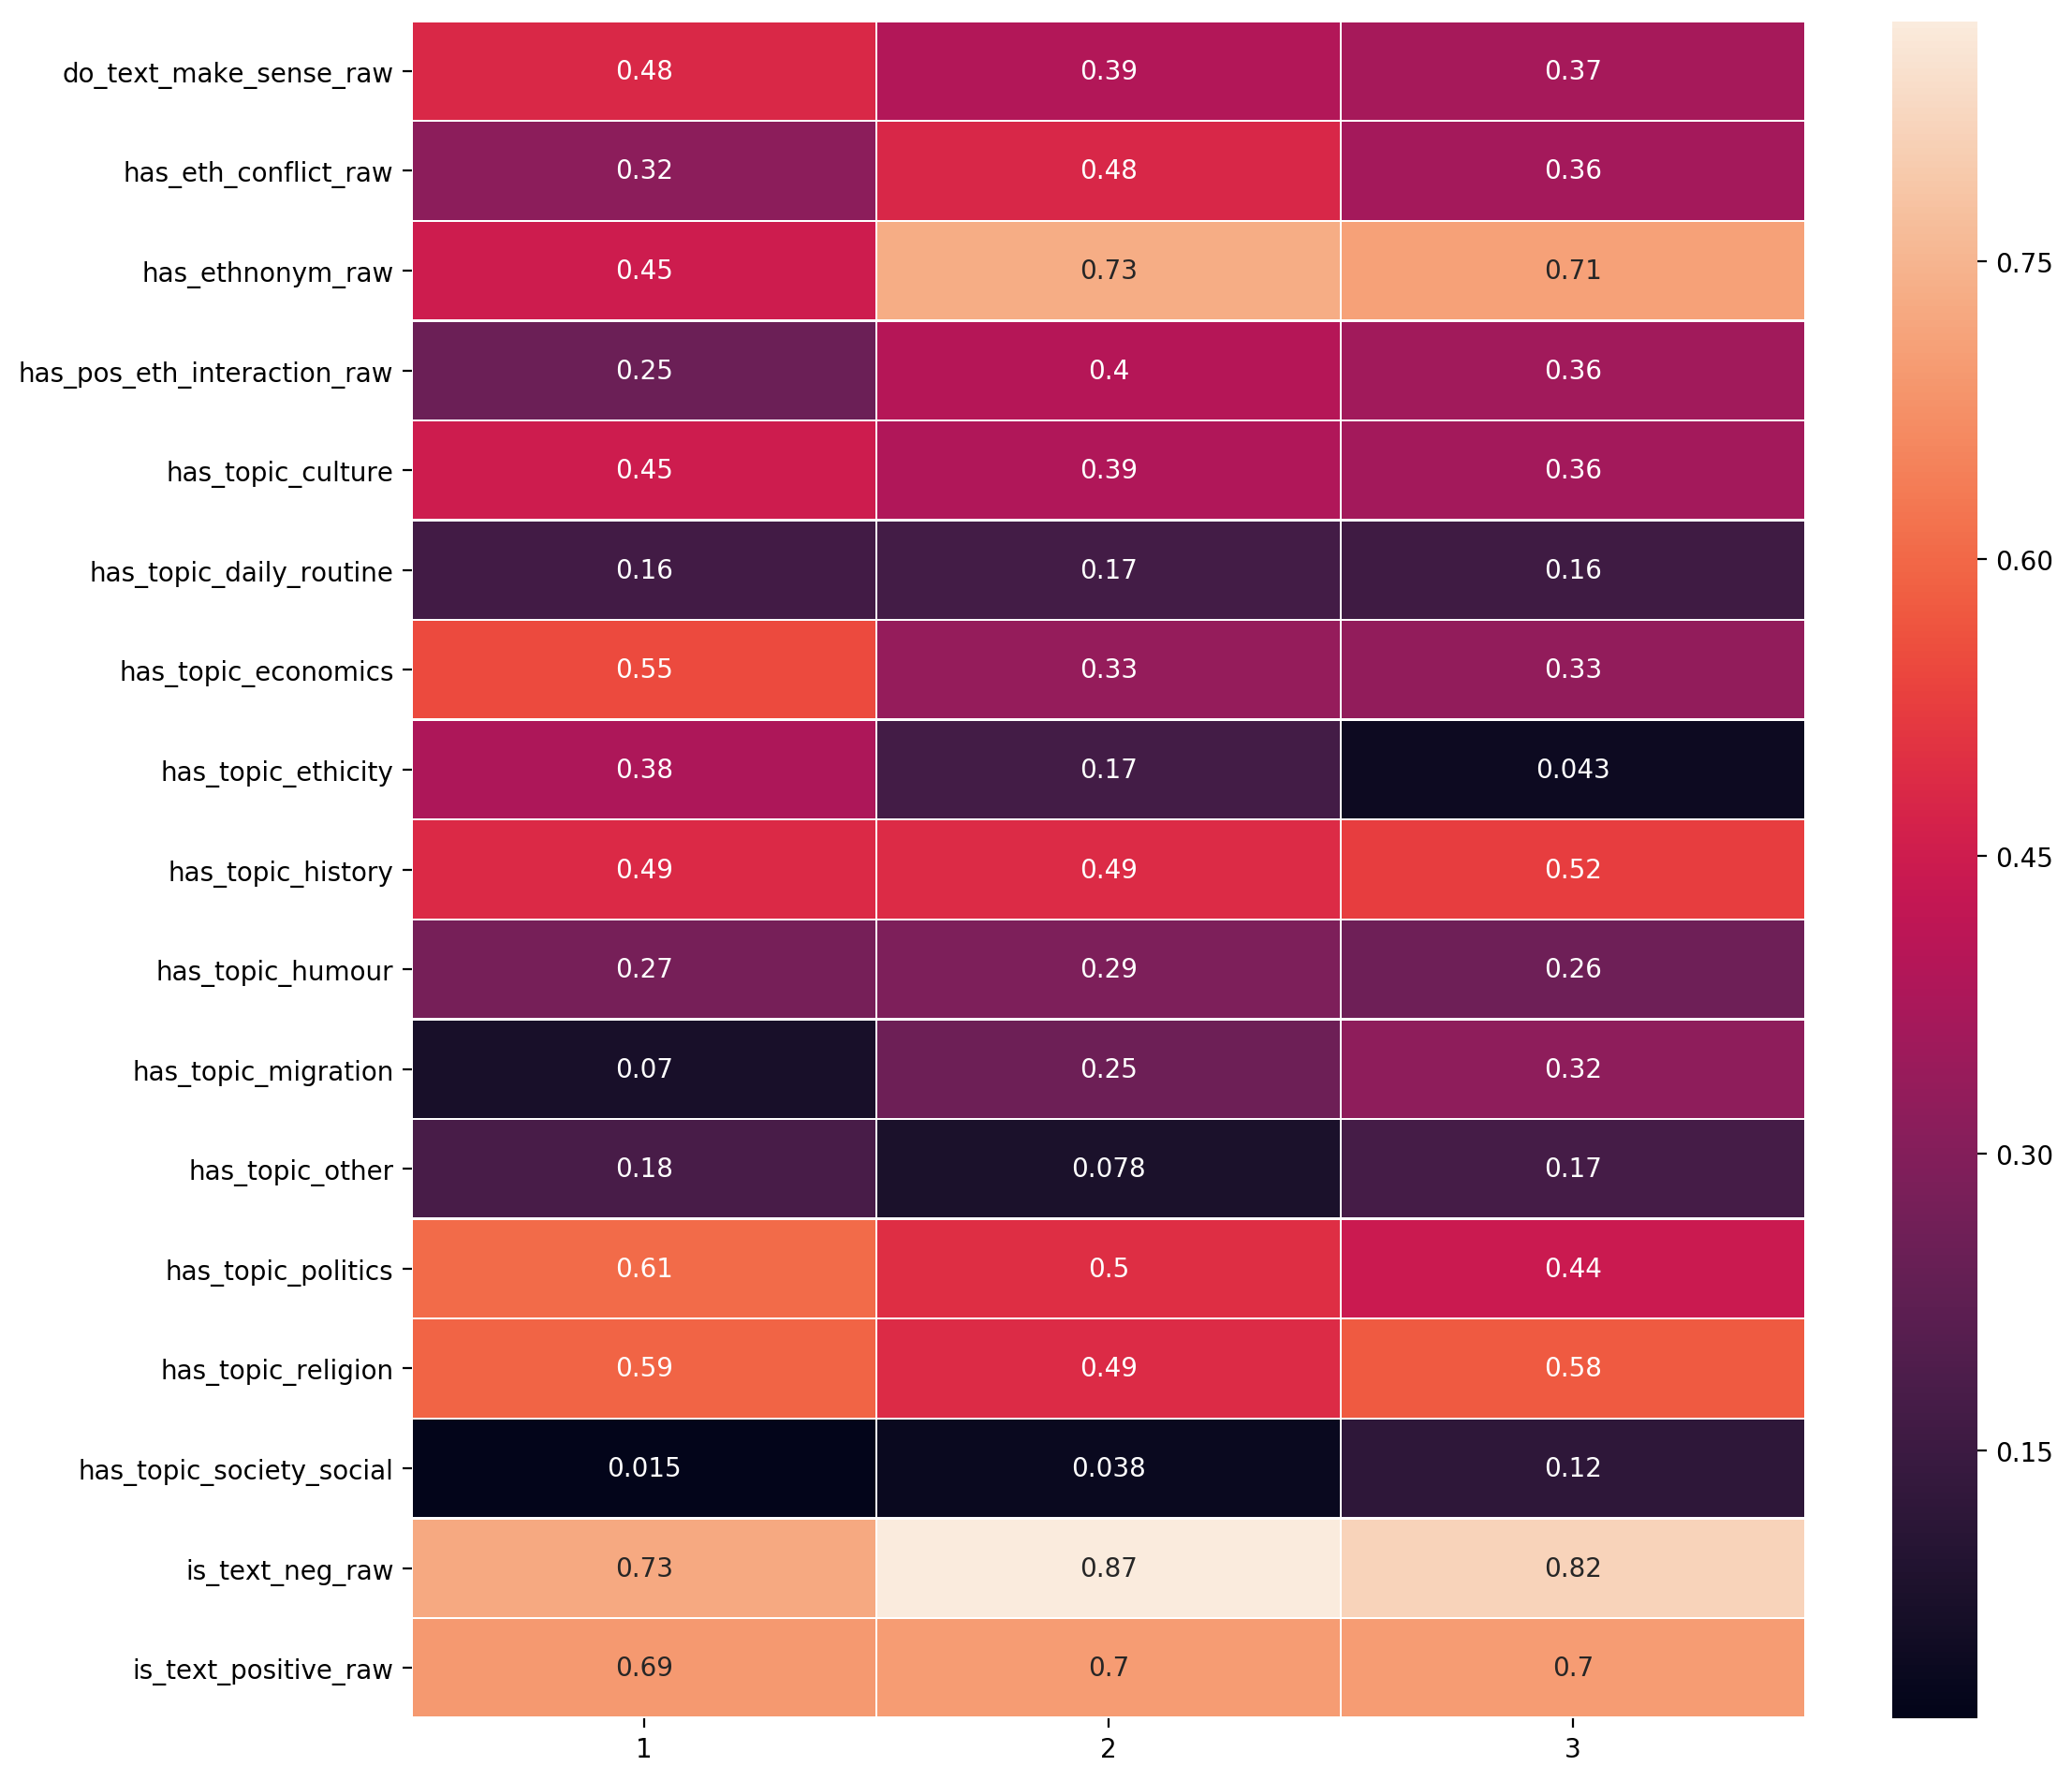

In [63]:
f, ax = plt.subplots(figsize=(12, 12), dpi=200)
sns.heatmap(pd.DataFrame(kripp_by_stages), annot=True, linewidths=.5, ax=ax)

Возможно дело в том, что кто-то отвечал очень плохо? Выкинем по очереди каждого кодировщика и посмотрим сумму по альфе без него:

In [15]:
asessors_evaluation = []

for assessor in df["assessor"].unique():
    withoutone = df[df["assessor"] != assessor].copy()
    krip_sum = 0
    for var in rename_dict:
        if (type(rename_dict[var]) == dict) and (rename_dict[var]["level"] == "answer") :
            dict_to_replace = {k: v["value"] for k, v in rename_dict[var]["recode"].items()}
            recoded = withoutone[[var + "_value", "document.id", "assessor"]].copy().replace(dict_to_replace)

            krip = krippendorff.alpha(get_reliability_data(recoded, var + "_value"),
                    level_of_measurement=rename_dict[var]["measument_level"])
            krip_sum += krip

    print(assessor, krip_sum)
    asessors_evaluation.append((assessor, krip_sum))

skuchilina 6.935421032582026
dianasadr 6.879924841365734
Oleg Nagornyy 6.892830155641945
nicketas 6.933612262836956
Tatiana 6.818916201479134
Dasha 6.9532956771380015
adzhigitova 6.781825141467577
an_men 6.897668224392132
yadviga 6.883325148159054
alyonam 6.911372907852096
asukhanova 6.95345765626179
yuvkhudyakov 7.017422075518997
salexeeva 6.933538923548128
SBodrunova 6.944967535193143
Stiin 6.958945366275541
Tankly 6.917346925791584
rin 6.942987239401926
justjust1919 6.944196852640288
amasalova 6.9420357973306235
PolinaEdapina 6.939603418087773
matveevmatveey@gmail.com 6.941748443554981
DariaN 7.128607493832277
mintbreeze 6.944492836672629
AnnaAnikina 6.9391120914485604
belchonok 7.009589318286968
nan 6.941688186140883
lubacurry 6.941452716462555


Рассчитываем сходимость по каппе Кохена (не сделано)

In [68]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
rel_data = get_reliability_data(df, "is_ethicity_aggressor_meaning" + "value")

In [ ]:
cohen_kappa_score(rel_data.loc[0].tolist(), rel_data.loc[1].tolist())